In [6]:
!pip install numpy matplotlib


Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import numpy as np
import matplotlib.pyplot as plt

AttributeError: module 'numpy' has no attribute 'ndarray'

In [ ]:
n = np.arange(-5,6)
x = np.array([0, 5, 6 ,7,9,0,0, -5, -9, -7, -6])
print(n)
print(x)

[-5 -4 -3 -2 -1  0  1  2  3  4  5]
[ 0  5  6  7  9  0  0 -5 -9 -7 -6]


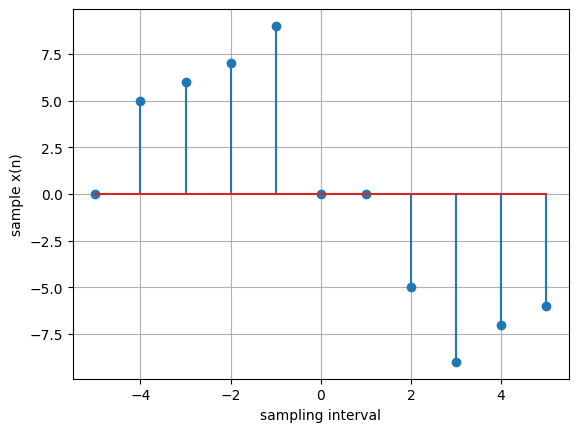

In [ ]:
plt.stem(n,x)
plt.xlabel('sampling interval')
plt.ylabel('sample x(n)')
plt.grid(True)
plt.show()

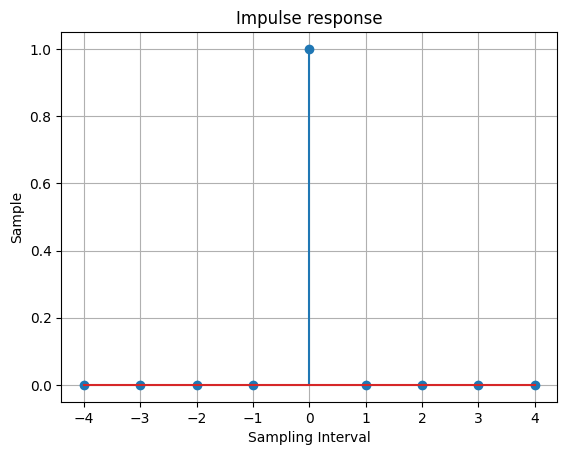

In [ ]:
n = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4])
xn = ([ 0, 0, 0, 0, 1, 0, 0, 0, 0])
plt.stem(n,xn)
plt.title('Impulse response')
plt.xlabel('Sampling Interval')
plt.ylabel('Sample')
plt.grid(True)
plt.show()

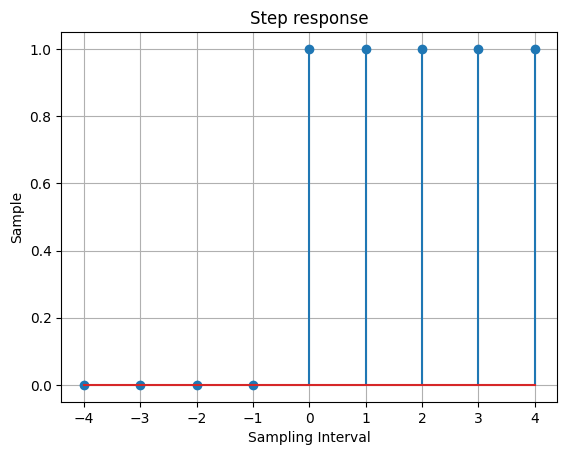

In [ ]:
n = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4])
xn = ([ 0, 0, 0, 0, 1, 1, 1, 1, 1])
plt.stem(n,xn)
plt.title('Step response')
plt.xlabel('Sampling Interval')
plt.ylabel('Sample')
plt.grid(True)
plt.show()

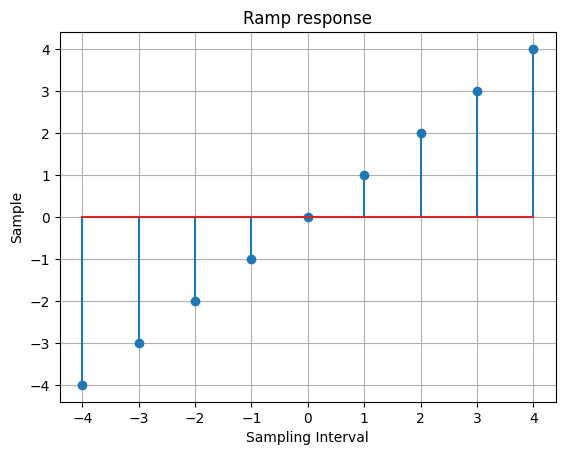

In [ ]:
n = np.array([-4, -3, -2, -1, 0, 1, 2, 3, 4])
xn = ([-4, -3, -2, -1, 0, 1, 2, 3, 4])
plt.stem(n,xn)
plt.title('Ramp response')
plt.xlabel('Sampling Interval')
plt.ylabel('Sample')
plt.grid(True)
plt.show()

In [ ]:
!pip list

Package                   Version
------------------------- -----------
altair                    5.5.0
annotated-types           0.7.0
anyio                     4.9.0
asttokens                 3.0.0
attrs                     25.3.0
blinker                   1.9.0
cachetools                5.5.2
certifi                   2025.4.26
charset-normalizer        3.4.2
click                     8.2.0
colorama                  0.4.6
comm                      0.2.2
contourpy                 1.3.1
control                   0.10.1
cycler                    0.12.1
debugpy                   1.8.12
decorator                 5.1.1
distro                    1.9.0
dnspython                 2.7.0
executing                 2.2.0
fonttools                 4.55.8
gitdb                     4.0.12
GitPython                 3.1.44
h11                       0.16.0
httpcore                  1.0.9
httpx                     0.28.1
httpx-ws                  0.7.2
idna                      3.10
imageio             

In [ ]:
!pip install opencv-python-headless

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


Image width: 2560px
Image height: 1706px
Number of channels: 3


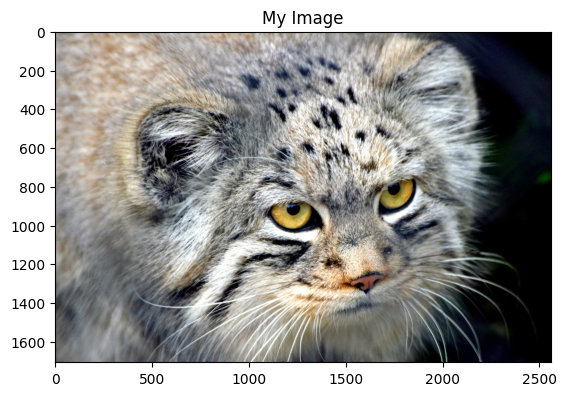

In [ ]:
import cv2 
import matplotlib.pyplot as plt

# Load an image (change 'image.jpg' to your image file path)
image = cv2.imread('image.jpg')

# Check if the image was loaded properly
if image is None:
    print("Error: Could not load image.")
else:
    # Get the size of the image
    height, width, channels = image.shape #[rows, columns, rbg--> [r,g,b]]
    print(f"Image width: {width}px")
    print(f"Image height: {height}px")
    print(f"Number of channels: {channels}")

    # Show the image in a window
    
    image_g = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Show the image in the notebook
    plt.imshow(image_gray)
    plt.title("My Image")
    plt.axis('on')  # You can use 'off' to hide axes
    plt.show()


In [ ]:
import copy

original = [[1, 2], [3, 4]]
shallow = copy.copy(original)

shallow[0][0] = 99
print(original)  # [[99, 2], [3, 4]]

[[99, 2], [3, 4]]


In [ ]:
original = [[1, 2], [3, 4]]
deep = copy.deepcopy(original)

In [ ]:
deep[0][0] = 99
print(original)
print(deep)

[[1, 2], [3, 4]]
[[99, 2], [3, 4]]


Detected objects: 4


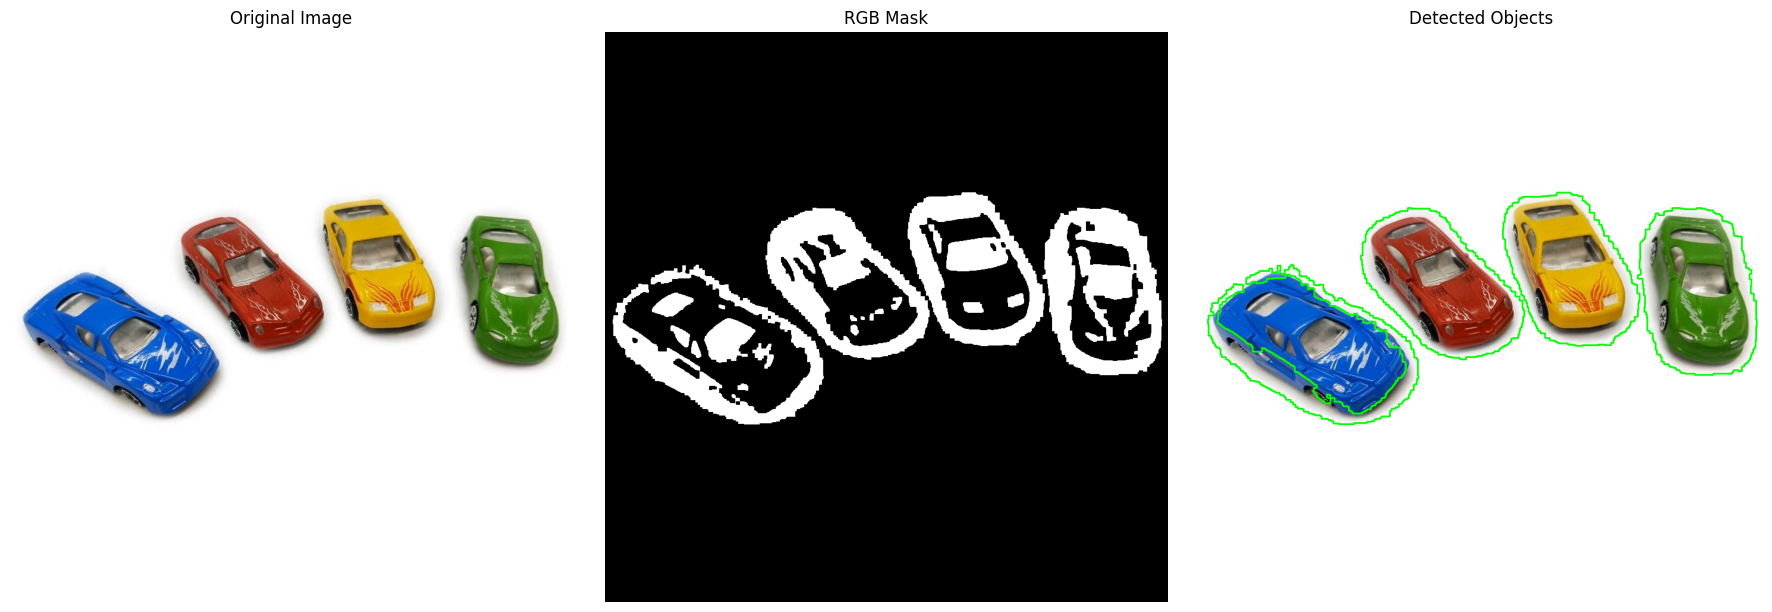

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load image (replace with your own image path)
image = cv2.imread('toys.jpg')  # Make sure the image is in your working directory
if image is None:
    print("Error: Could not load image.")
else:
    # Convert to RGB
    rgb_image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Define RGB color range (example: red objects)
    lower_rgb = np.array([30, 30, 30])
    upper_rgb = np.array([350, 350, 252])

    # Create mask
    mask = cv2.inRange(rgb_image, lower_rgb, upper_rgb)

    # Clean up mask
    kernel = np.ones((5, 5), np.uint8)
    mask_cleaned = cv2.morphologyEx(mask, cv2.MORPH_OPEN, kernel)
    mask_cleaned = cv2.morphologyEx(mask_cleaned, cv2.MORPH_CLOSE, kernel)

    # Find contours
    contours, _ = cv2.findContours(mask_cleaned, cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    # Draw contours
    output_image = rgb_image.copy()
    count = 0
    for contour in contours:
        if cv2.contourArea(contour) > 5000:
            count += 1
            cv2.drawContours(output_image, [contour], -1, (0, 255, 0), 2)

    print(f"Detected objects: {count}")

    # Plotting images inline
    fig, axs = plt.subplots(1, 3, figsize=(18, 6))

    axs[0].imshow(rgb_image)
    axs[0].set_title("Original Image")
    axs[0].axis('off')

    axs[1].imshow(mask_cleaned, cmap='gray')
    axs[1].set_title("RGB Mask")
    axs[1].axis('off')

    axs[2].imshow(output_image)
    axs[2].set_title("Detected Objects")
    axs[2].axis('off')

    plt.tight_layout()
    plt.show()


In [ ]:
!pip install scikit-image 

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


30040.0
31785.0
32146.0
45423.0


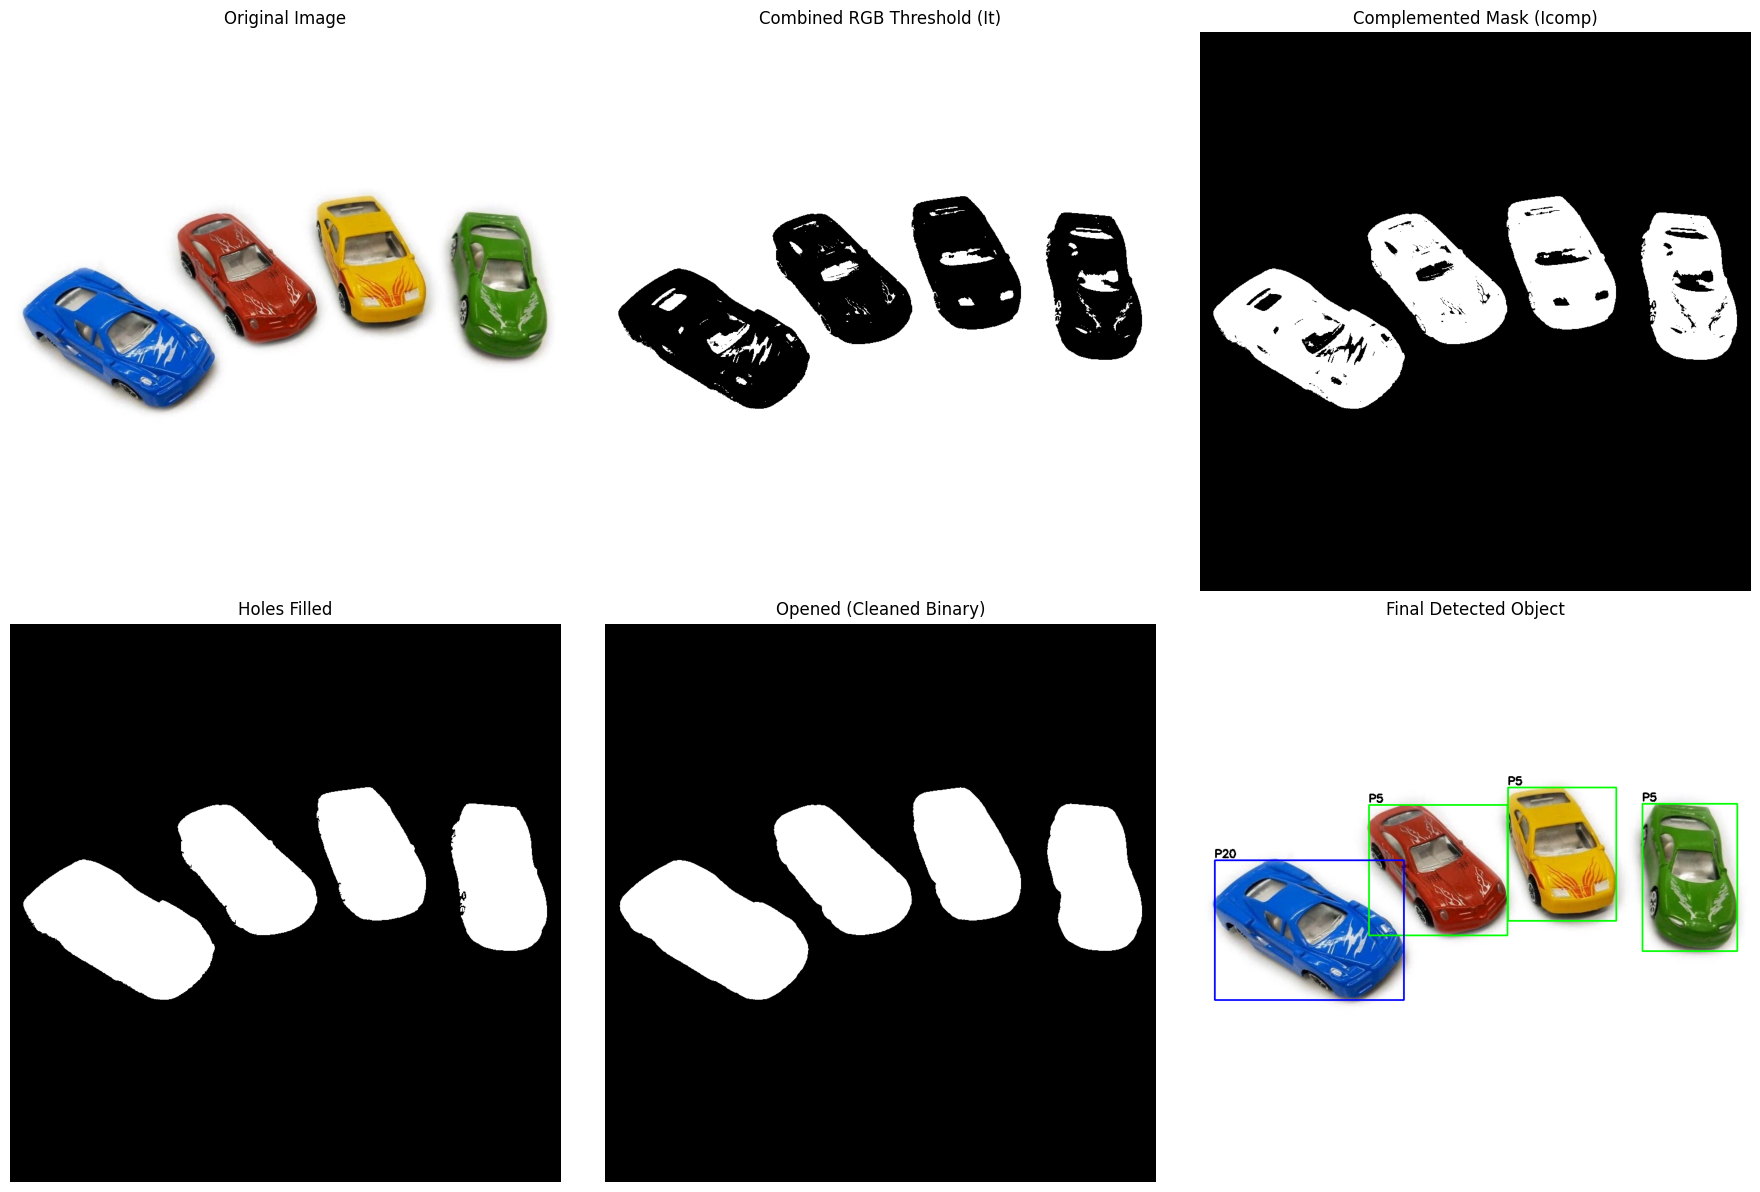

small: 0
medium: 3
large: 1
count: 4


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
from skimage.morphology import disk, opening
from skimage.util import invert

# Load image
image = cv2.imread('toys.jpg')
if image is None:
    raise FileNotFoundError("Image not found.")

# Convert to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Extract channels
rmat = image_rgb[:, :, 0]
gmat = image_rgb[:, :, 1]
bmat = image_rgb[:, :, 2]

# Threshold levels
levelr = 0.5 * 255
levelg = 0.45 * 255
levelb = 0.5 * 255

# Threshold RGB channels
Ired = (rmat > levelr).astype(np.uint8)
Igreen = (gmat > levelg).astype(np.uint8)
Iblue = (bmat > levelb).astype(np.uint8)

# Combine channels
It = cv2.bitwise_and(cv2.bitwise_and(Ired, Igreen), Iblue)

# Invert mask
Icomp = cv2.bitwise_not(It * 255)

# Fill holes
flood_fill = Icomp.copy()
h, w = flood_fill.shape
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(flood_fill, mask, (0, 0), 255)
filled = cv2.bitwise_or(Icomp, cv2.bitwise_not(flood_fill))

# Morphological open
opened = opening(filled // 255, disk(25)).astype(np.uint8)

# Label connected components
label_image = label(opened)
regions = regionprops(label_image)

###
for region in regions:
        area = region.area
        centroid = region.centroid
        print(area)

# Classify objects
small, medium, large = [], [], []
for region in regions:
    area = region.area
    if area < 14000:
        small.append(region)
    elif area < 45000:
        medium.append(region)
    else:
        large.append(region)

# Draw boxes on copy of image
output_img = image_rgb.copy()
for region in small:
    minr, minc, maxr, maxc = region.bbox
    cv2.rectangle(output_img, (minc, minr), (maxc, maxr), (255, 0, 0), 2)
    cv2.putText(output_img, 'P1', (minc, minr - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

for region in medium:
    minr, minc, maxr, maxc = region.bbox
    cv2.rectangle(output_img, (minc, minr), (maxc, maxr), (0, 255, 0), 2)
    cv2.putText(output_img, 'P5', (minc, minr - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

for region in large:
    minr, minc, maxr, maxc = region.bbox
    cv2.rectangle(output_img, (minc, minr), (maxc, maxr), (0, 0, 255), 2)
    cv2.putText(output_img, 'P20', (minc, minr - 5), cv2.FONT_HERSHEY_SIMPLEX, 0.6, (0, 0, 0), 2)

# Display results side-by-side
fig, axs = plt.subplots(2, 3, figsize=(18, 12))

axs[0, 0].imshow(image_rgb)
axs[0, 0].set_title("Original Image")
axs[0, 0].axis("off")

axs[0, 1].imshow(It, cmap='gray')
axs[0, 1].set_title("Combined RGB Threshold (It)")
axs[0, 1].axis("off")

axs[0, 2].imshow(Icomp, cmap='gray')
axs[0, 2].set_title("Complemented Mask (Icomp)")
axs[0, 2].axis("off")

axs[1, 0].imshow(filled, cmap='gray')
axs[1, 0].set_title("Holes Filled")
axs[1, 0].axis("off")

axs[1, 1].imshow(opened, cmap='gray')
axs[1, 1].set_title("Opened (Cleaned Binary)")
axs[1, 1].axis("off")

axs[1, 2].imshow(output_img)
axs[1, 2].set_title("Final Detected Object")
axs[1, 2].axis("off")

plt.tight_layout()
plt.show()

# Display total value
total_value = len(small)  + len(medium)  + len(large) 
print(f"small: {len(small)}")
print(f"medium: {len(medium)}")
print(f"large: {len(large)}")
print(f"count: {total_value}")


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage.measure import label, regionprops
from skimage.morphology import disk, opening
from skimage.util import invert

# Load image
image = cv2.imread('toys.jpg')
if image is None:
    raise FileNotFoundError("Image not found.")

# Convert to RGB
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

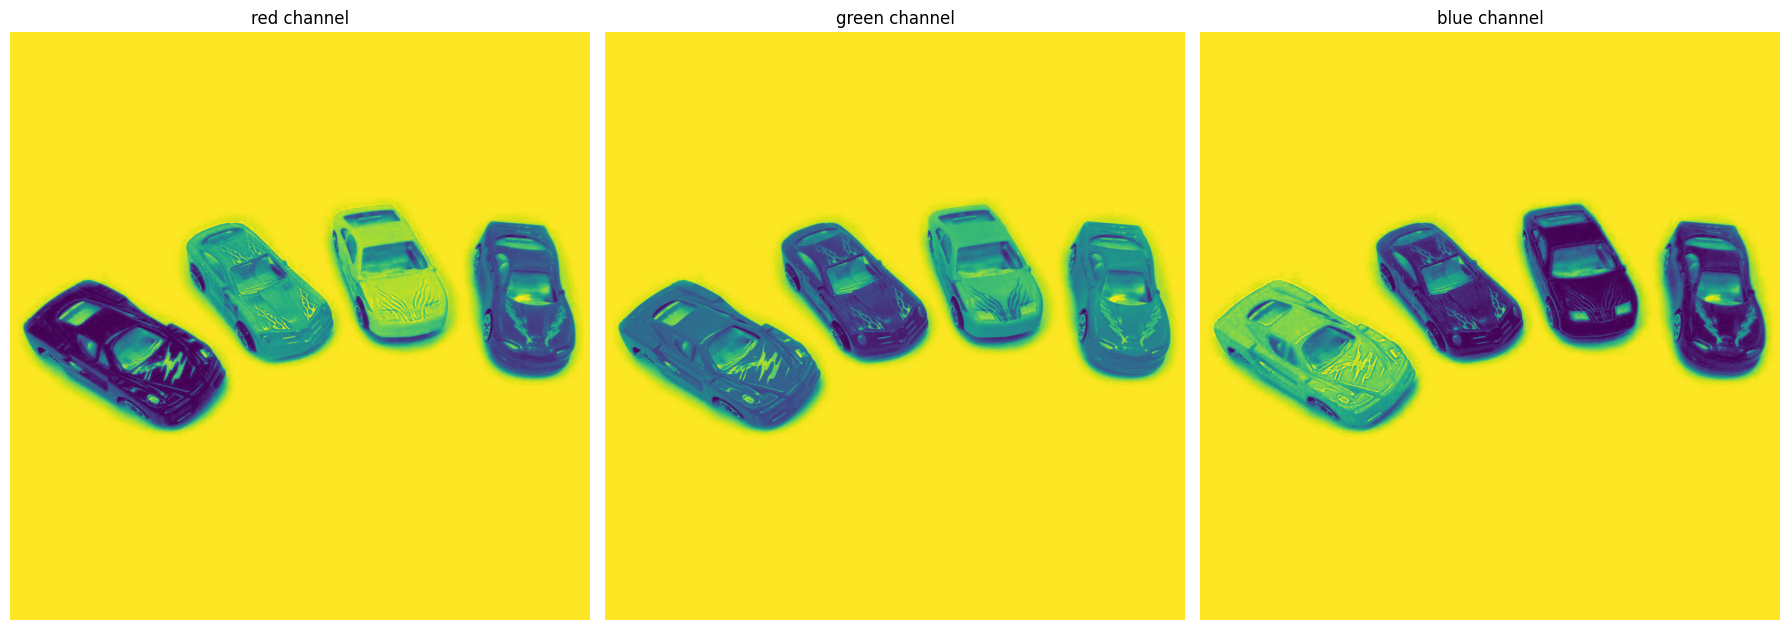

In [ ]:
# Extract channels
rmat = image_rgb[:, :, 0]
gmat = image_rgb[:, :, 1]
bmat = image_rgb[:, :, 2]
#show image for each channel
fig, axs = plt.subplots(1, 3, figsize=(18, 12))
axs[0].imshow(rmat)
axs[0].set_title("red channel")
axs[0].axis("off")

axs[1].imshow(gmat)
axs[1].set_title("green channel")
axs[1].axis("off")

axs[2].imshow(bmat)
axs[2].set_title("blue channel")
axs[2].axis("off")

plt.tight_layout()
plt.show()

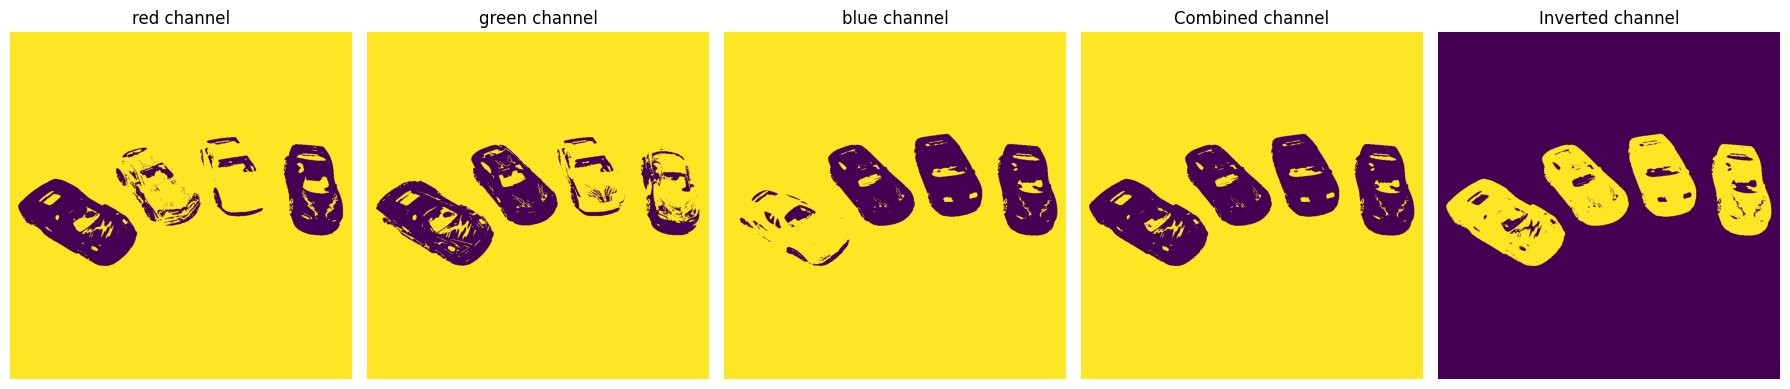

In [ ]:
# Threshold levels
levelr = 0.5 * 255
levelg = 0.45 * 255
levelb = 0.5 * 255

# Threshold RGB channels
Ired = (rmat > levelr).astype(np.uint8)
Igreen = (gmat > levelg).astype(np.uint8)
Iblue = (bmat > levelb).astype(np.uint8)

# Combine channels
It = cv2.bitwise_and(cv2.bitwise_and(Ired, Igreen), Iblue)

# Invert mask
Icomp = cv2.bitwise_not(It * 255)

#show image for each channel
fig, axs = plt.subplots(1, 5, figsize=(18, 12))
axs[0].imshow(Ired)
axs[0].set_title("red channel")
axs[0].axis("off")

axs[1].imshow(Igreen)
axs[1].set_title("green channel")
axs[1].axis("off")

axs[2].imshow(Iblue)
axs[2].set_title("blue channel")
axs[2].axis("off")

axs[3].imshow(It)
axs[3].set_title("Combined channel")
axs[3].axis("off")

axs[4].imshow(Icomp)
axs[4].set_title("Inverted channel")
axs[4].axis("off")

plt.tight_layout()
plt.show()

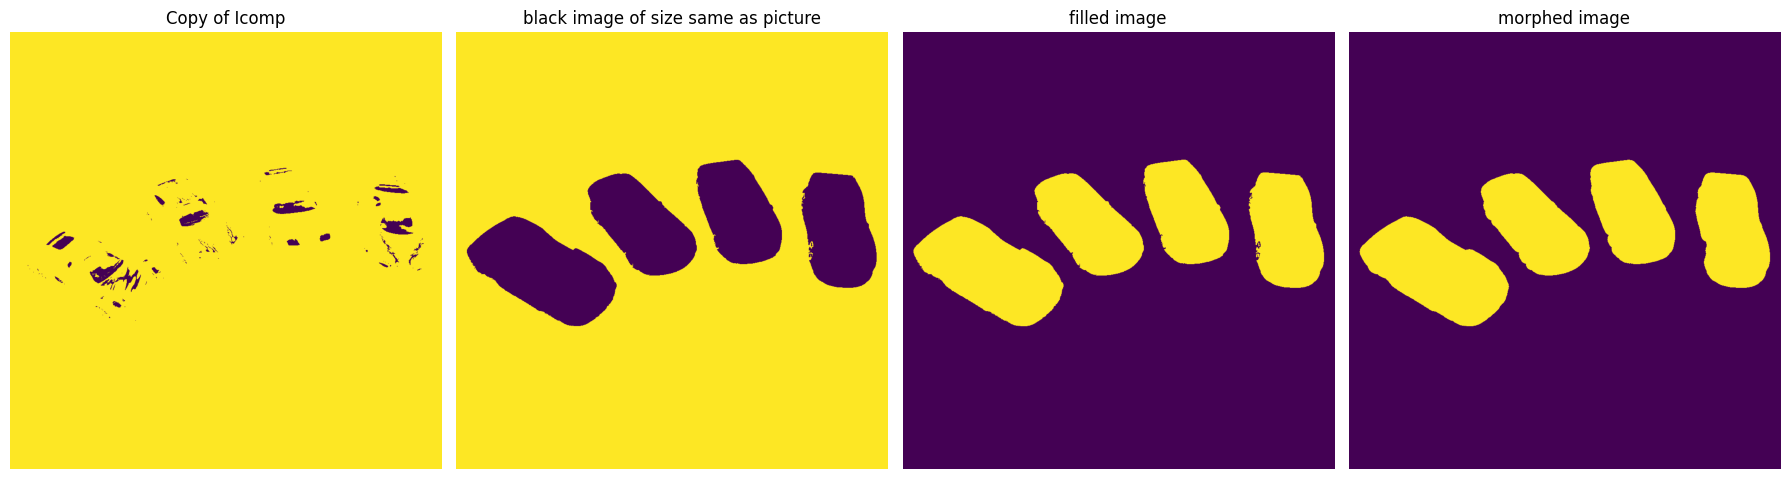

30177.0
31914.0
32290.0
45544.0


In [ ]:
# Fill holes
flood_fill = Icomp.copy()
h, w = flood_fill.shape
mask = np.zeros((h+2, w+2), np.uint8)
cv2.floodFill(flood_fill, mask, (0, 0), 255)
filled = cv2.bitwise_or(Icomp, cv2.bitwise_not(flood_fill))

# Morphological open
opened = opening(filled // 255, disk(15)).astype(np.uint8)

# Label connected components
label_image = label(opened)
regions = regionprops(label_image)

#show image for each channel
fig, axs = plt.subplots(1, 4, figsize=(18, 12))
axs[0].imshow(flood_fill)
axs[0].set_title("Copy of Icomp")
axs[0].axis("off")

axs[1].imshow(mask)
axs[1].set_title("black image of size same as picture")
axs[1].axis("off")

axs[2].imshow(filled)
axs[2].set_title("filled image")
axs[2].axis("off")

axs[3].imshow(opened)
axs[3].set_title("morphed image")
axs[3].axis("off")


plt.tight_layout()
plt.show()
###
for region in regions:
        area = region.area
        print(area)

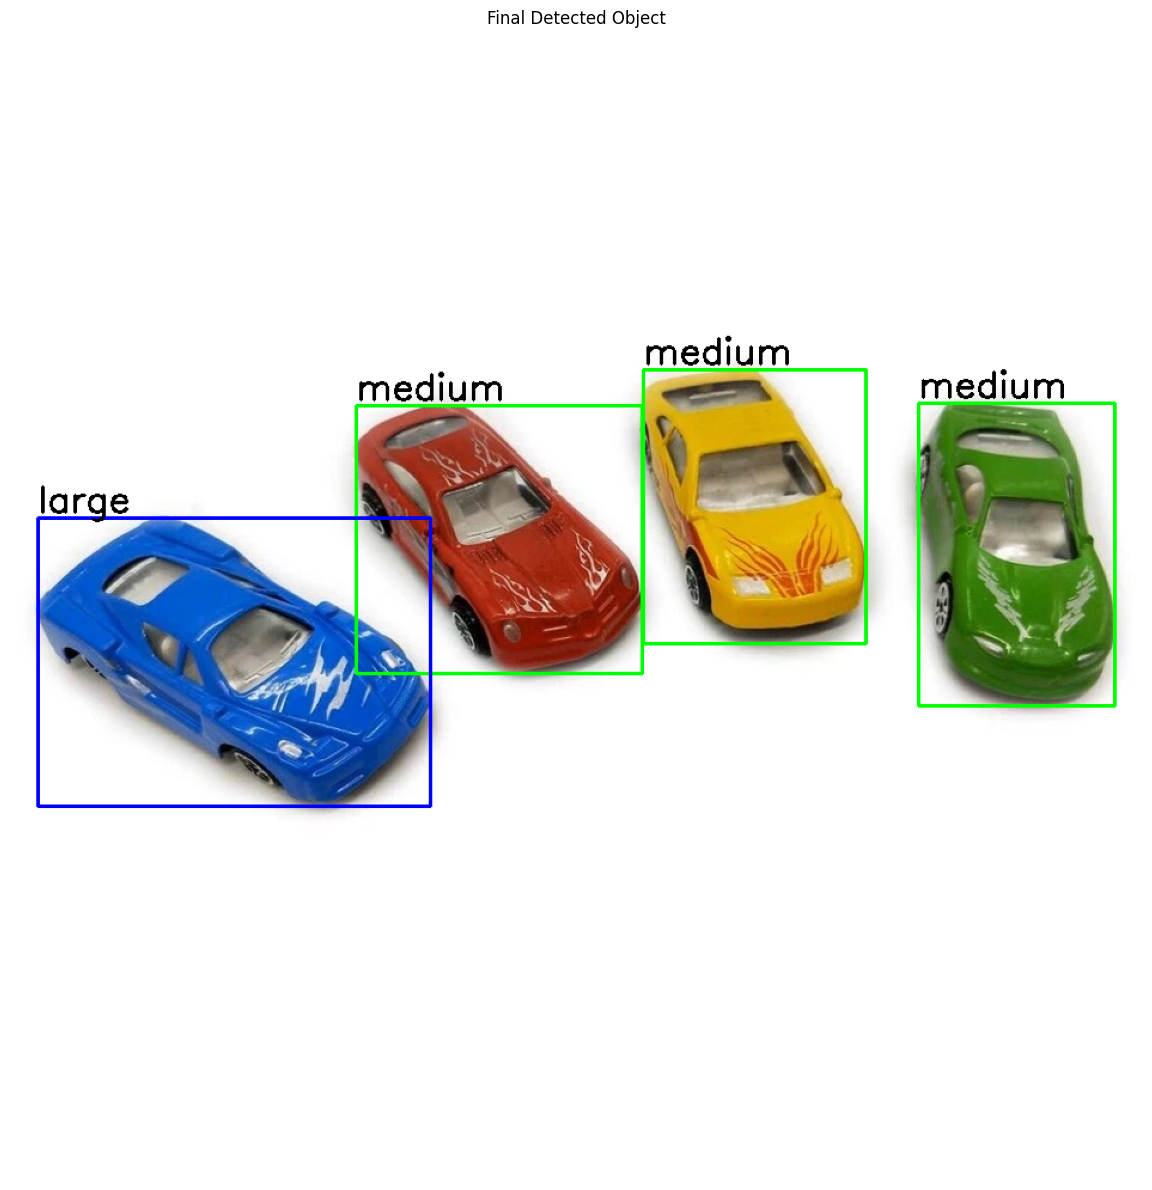

small: 0
medium: 3
large: 1
count: 4


In [ ]:
# Classify objects
small, medium, large = [], [], []
for region in regions:
    area = region.area
    if area < 14000:
        small.append(region)
    elif area < 45000:
        medium.append(region)
    else:
        large.append(region)

# Draw boxes on copy of image
output_img = image_rgb.copy()
for region in small:
    minr, minc, maxr, maxc = region.bbox
    cv2.rectangle(output_img, (minc, minr), (maxc, maxr), (255, 0, 0), 2)
    cv2.putText(output_img, 'small', (minc, minr - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

for region in medium:
    minr, minc, maxr, maxc = region.bbox
    cv2.rectangle(output_img, (minc, minr), (maxc, maxr), (0, 255, 0), 2)
    cv2.putText(output_img, 'medium', (minc, minr - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

for region in large:
    minr, minc, maxr, maxc = region.bbox
    cv2.rectangle(output_img, (minc, minr), (maxc, maxr), (0, 0, 255), 2)
    cv2.putText(output_img, 'large', (minc, minr - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 0, 0), 2)

# Display results side-by-side
fig, axs = plt.subplots(1, 1, figsize=(18, 12))

axs.imshow(output_img)
axs.set_title("Final Detected Object")
axs.axis("off")

plt.tight_layout()
plt.show()

# Display total value
total_value = len(small)  + len(medium)  + len(large) 
print(f"small: {len(small)}")
print(f"medium: {len(medium)}")
print(f"large: {len(large)}")
print(f"count: {total_value}")

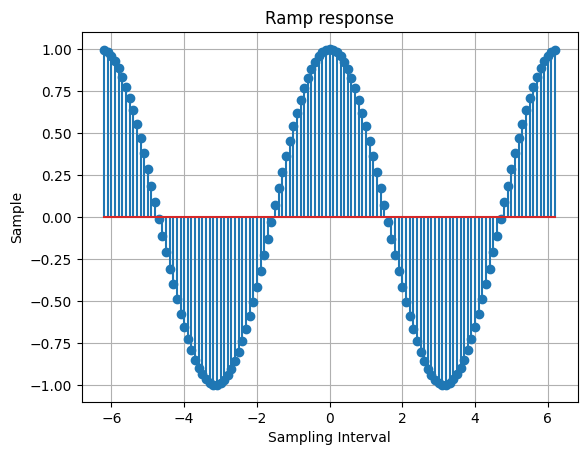

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

n = np.arange(-6.2,6.3,0.1) #1 and #2. n = np.arange(-3.1,3.2,0.1), #3 and #4 n = np.arange(-6.2,6.3,0.1)
xn = np.cos(n) #1 np.sin(n) #2 np.cos(n) #3 np.sin(n) #4 np.cos(n) 
plt.stem(n,xn)
plt.title('Ramp response') #Sin wave/ Cosine wave
plt.xlabel('Sampling Interval')
plt.ylabel('Sample')
plt.grid(True)
plt.show()

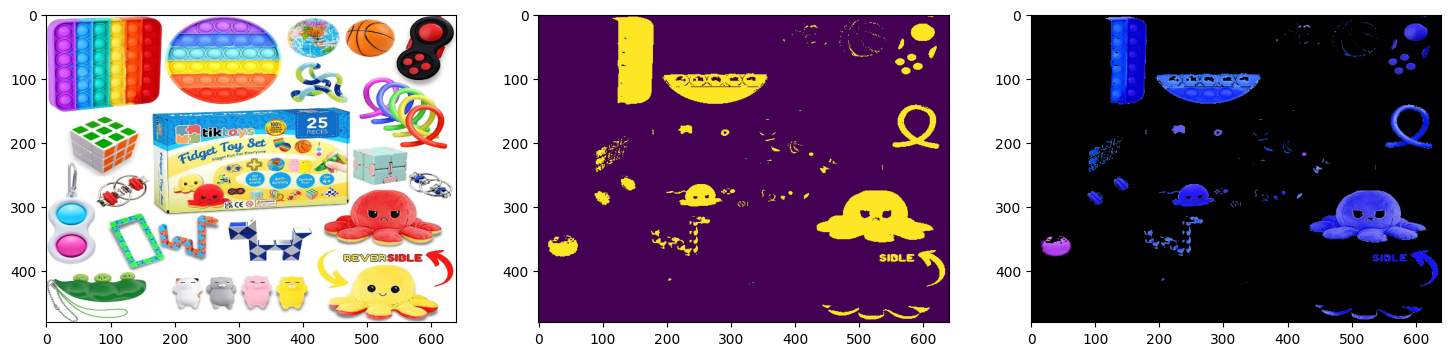

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
# Load the image
image = cv2.imread('myImage.png')
image = cv2.resize(image, (640, 480))  # Resize if needed

# Convert to HSV
image_rgb = cv2.cvtColor(image,cv2.COLOR_BGR2RGB)
hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

# Define the red color range in HSV
# Red can span across the 0 and 180 boundaries, so we need two ranges
lower_red1 = np.array([0, 100, 100])
upper_red1 = np.array([10, 255, 255])

lower_red2 = np.array([160, 100, 100])
upper_red2 = np.array([180, 255, 255])

# Create masks
mask1 = cv2.inRange(hsv, lower_red1, upper_red1)
mask2 = cv2.inRange(hsv, lower_red2, upper_red2)

# Combine both masks
red_mask = cv2.bitwise_or(mask1, mask2)

# Apply the mask to the original image
red_result = cv2.bitwise_and(image, image, mask=red_mask)

fig, axs = plt.subplots(1, 3, figsize=(18, 12))
# Display the results
axs[0].imshow(image_rgb)
axs[1].imshow(red_mask)
axs[2].imshow(red_result)


In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output

def classify_coin(radius):
    if 10 <= radius < 18:
        return 'PHP 0.01', 0.01
    elif 18 <= radius < 25:
        return 'PHP 0.25', 0.25
    elif 25 <= radius < 33:
        return 'PHP 1', 1
    elif 33 <= radius < 40:
        return 'PHP 5', 5
    elif 40 <= radius < 50:
        return 'PHP 10', 10
    else:
        return None, 0

cap = cv2.VideoCapture(1)  

if not cap.isOpened():
    print("Cannot open camera")
    exit()

try:
    while True:
        ret, frame = cap.read()
        if not ret:
            print("Failed to grab frame")
            break

        frame = cv2.resize(frame, (640, 480))
        output = frame.copy()
        gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)

        blurred = cv2.medianBlur(gray, 7)

        circles = cv2.HoughCircles(
            blurred,
            cv2.HOUGH_GRADIENT,
            dp=1.2,
            minDist=30,
            param1=50,
            param2=30,
            minRadius=10,
            maxRadius=50
        )

        coin_count = 0
        total_value = 0.0

        if circles is not None:
            circles = np.round(circles[0, :]).astype("int")
            for (x, y, r) in circles:
                label, value = classify_coin(r)
                if value > 0:
                    coin_count += 1
                    total_value += value
                    cv2.circle(output, (x, y), r, (0, 255, 0), 2)
                    cv2.putText(output, f"{label}", (x - 40, y),
                                cv2.FONT_HERSHEY_SIMPLEX, 0.7, (0, 0, 255), 2)

        cv2.putText(output, f"Total coins: {coin_count}", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2)
        cv2.putText(output, f"Total value: PHP {total_value:.2f}", (10, 70),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2)

        plt.figure(figsize=(10, 6))
        plt.imshow(cv2.cvtColor(output, cv2.COLOR_BGR2RGB))
        plt.axis("off")
        plt.title(f"Coins: {coin_count} | Total: PHP {total_value:.2f}")
        plt.show()

        clear_output(wait=True)

except KeyboardInterrupt:
    print("Stopped by user.")

finally:
    cap.release()


Stopped by user.


In [ ]:
!pip install imutils

Defaulting to user installation because normal site-packages is not writeable



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [11]:
pip install pytesseract

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 24.3.1 -> 25.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [ ]:
import cv2
import numpy as np
import imutils
import tkinter as tk
from threading import Thread

number_color_ranges = {
    'PHP 50': ((0, 100, 150), (20, 255, 255)),    
    'PHP 20': ((100, 20, 150), (180, 100, 255)),  
    'PHP 100': ((120, 50, 50), (255, 120, 120)),  
    'PHP 200': ((0, 150, 0), (90, 255, 90)),      
    'PHP 500': ((0, 170, 200), (60, 255, 255)),   
    'PHP 1000': ((200, 170, 140), (255, 255, 255))
}

def boxes_overlap(box1, box2):
    x1, y1, w1, h1 = box1
    x2, y2, w2, h2 = box2
    return not ((x1 > x2 + w2) or (x2 > x1 + w1) or (y1 > y2 + h2) or (y2 > y1 + h1))

def detect_bills_by_number_color(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    edged = cv2.Canny(gray, 50, 150)
    contours, _ = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)

    detected_bills = []
    total_value = 0
    detected_boxes = []

    for contour in contours:
        perimeter = cv2.arcLength(contour, True)
        approx = cv2.approxPolyDP(contour, 0.04 * perimeter, True)
        x, y, w, h = cv2.boundingRect(approx)
        area = cv2.contourArea(approx)
        aspect_ratio = w / float(h)

        if area > 15000 and 1.5 < aspect_ratio < 2.5:
            overlap_found = any(boxes_overlap((x, y, w, h), db) for db in detected_boxes)
            if overlap_found:
                continue

            roi = frame[y:y+int(h*0.3), x:x+int(w*0.3)]
            if roi.size == 0:
                continue

            hsv_roi = cv2.cvtColor(roi, cv2.COLOR_BGR2HSV)
            best_match = None
            max_pixels = 0

            for bill, (lower, upper) in number_color_ranges.items():
                lower_np = np.array(lower)
                upper_np = np.array(upper)
                mask = cv2.inRange(hsv_roi, lower_np, upper_np)
                pixel_count = cv2.countNonZero(mask)

                if pixel_count > max_pixels:
                    max_pixels = pixel_count
                    best_match = bill

            if max_pixels > 500:
                value = int(best_match.split()[1])
                detected_bills.append(best_match)
                detected_boxes.append((x, y, w, h))
                total_value += value

                cv2.rectangle(frame, (x, y), (x + w, y + h), (0, 255, 0), 2)
                cv2.putText(frame, best_match, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 1, (0, 255, 0), 2)

    return frame, detected_bills, total_value

def update_gui():
    total_bills_var.set(f"Total Bills: {len(detected_bills)}")
    total_value_var.set(f"Total Value: PHP {total}")

def video_loop():
    global detected_bills, total

    cap = cv2.VideoCapture(1)

    while True:
        ret, frame = cap.read()
        if not ret:
            break

        frame = imutils.resize(frame, width=640)
        output_frame, detected_bills, total = detect_bills_by_number_color(frame)

        update_gui()

        cv2.putText(output_frame, f"Total Bills: {len(detected_bills)}", (10, 30),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2)
        cv2.putText(output_frame, f"Total Value: PHP {total}", (10, 70),
                    cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 0), 2)

        cv2.imshow("Bill Detection", output_frame)
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break

    cap.release()
    cv2.destroyAllWindows()
    root.quit()  

root = tk.Tk()
root.title("Real-Time PHP Bill Detection")
root.geometry("300x150")
root.resizable(False, False)

total_bills_var = tk.StringVar()
total_value_var = tk.StringVar()

tk.Label(root, text="Detected Bills:", font=("Arial", 14)).pack(pady=10)
tk.Label(root, textvariable=total_bills_var, font=("Arial", 12)).pack()
tk.Label(root, textvariable=total_value_var, font=("Arial", 12)).pack()


detected_bills = []
total = 0

video_thread = Thread(target=video_loop)
video_thread.daemon = True
video_thread.start()

root.mainloop()
